In [12]:
from utils import database
import matplotlib.pyplot as plt
import pandas as pd

datalist0, timelist0 = database.get_local_container_history('rqst50cntnr0')
datalist1, timelist1 = database.get_local_container_history('rqst50cntnr1')
datalist2, timelist2 = database.get_local_container_history('rqst50cntnr2')

print(len(datalist0), ' ', len(timelist0))
print(len(datalist1), ' ', len(timelist1))
print(len(datalist2), ' ', len(timelist2))

timediff0 = [(item - timelist0[0]).seconds for item in timelist0]
timediff1 = [(item - timelist0[0]).seconds for item in timelist1]
timediff2 = [(item - timelist0[0]).seconds for item in timelist2]

print(timelist0[0], ' ', timelist0[-1])
print(timelist1[0], ' ', timelist1[-1])
print(timelist2[0], ' ', timelist2[-1])

304   304
311   311
305   305
2020-02-29 00:07:04   2020-02-29 00:14:31
2020-02-29 00:07:16   2020-02-29 00:14:45
2020-02-29 00:07:06   2020-02-29 00:14:33


In [13]:
memory0 = []
limit0 = []
swap0 = []
memory1 = []
limit1 = []
swap1 = []
memory2 = []
limit2 = []
swap2 = []


for item in datalist0:
    if item.state != 'SUSPENDED':
        memory0.append((int(item.mem_stats['rss']) + int(item.mem_stats['cache'])) // 2 ** 20)
        limit0.append(item.mem_limit // 2 ** 20)
        swap0.append(int(item.mem_stats['swap']) // 2 ** 20)
    
    elif item.state in ['SUSPENDED','STOPPED']:
        memory0.append(int(0))
        limit0.append(int(0))
        swap0.append(int(0))
        
for item in datalist1:
    if item.state != 'SUSPENDED':
        memory1.append((int(item.mem_stats['rss']) + int(item.mem_stats['cache'])) // 2 ** 20)
        limit1.append(item.mem_limit // 2 ** 20)
        swap1.append(int(item.mem_stats['swap']) // 2 ** 20)
    
    elif item.state in ['SUSPENDED','STOPPED']:
        memory1.append(int(0))
        limit1.append(int(0))
        swap1.append(int(0))

for item in datalist2:
    if item.state != 'SUSPENDED':
        memory2.append((int(item.mem_stats['rss']) + int(item.mem_stats['cache'])) // 2 ** 20)
        limit2.append(item.mem_limit // 2 ** 20)
        swap2.append(int(item.mem_stats['swap']) // 2 ** 20)
    
    elif item.state in ['SUSPENDED','STOPPED']:
        memory2.append(int(0))
        limit2.append(int(0))
        swap2.append(int(0))

In [14]:
print('Total time C1: ', (timelist0[-1] - timelist0[0]).seconds)
print('Total time C2: ', (timelist1[-1] - timelist1[0]).seconds)
print('Total time C3: ', (timelist2[-1] - timelist2[0]).seconds)

index = 0
s1 = False
start_susp = 0
stop_susp = 0

for item in datalist1:
    if item.state == 'SUSPENDED' and s1 == False:
        start_susp = timelist1[index]
        s1 = True
        
    if item.state == 'RUNNING' and s1 == True:
        stop_susp = timelist1[index]
        s1 = False
        
    index += 1

#print('C2 Suspension time: ', (stop_susp - start_susp).seconds)
#print('C2 Execution time: ', ((timelist1[-1] - timelist1[0]).seconds) - ((stop_susp - start_susp).seconds))
        

Total time C1:  447
Total time C2:  449
Total time C3:  447


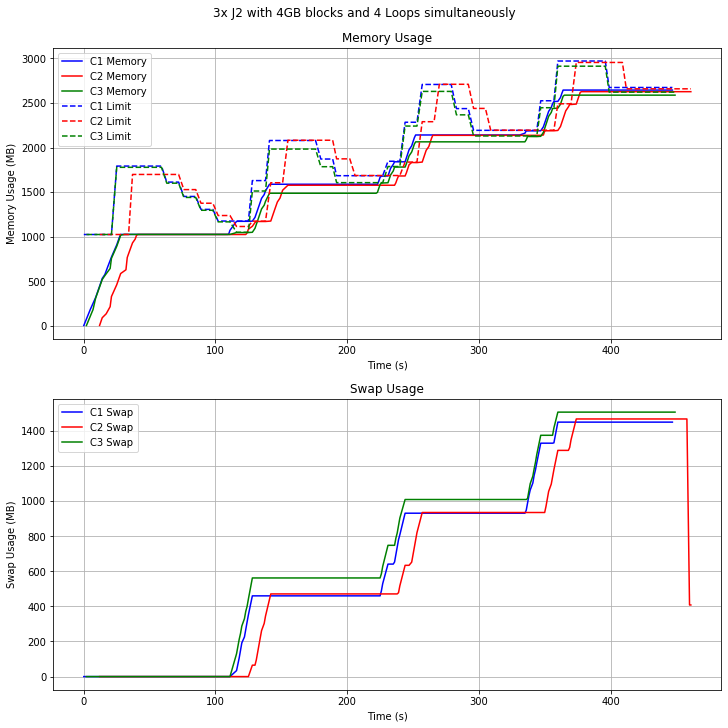

In [15]:
fig, ax = plt.subplots(ncols=1, nrows=2, constrained_layout=True, figsize=(10,10))

ax[0].plot(timediff0, memory0, label='C1 Memory', color='blue')
ax[0].plot(timediff1, memory1, label='C2 Memory', color='red')
ax[0].plot(timediff2, memory2, label='C3 Memory', color='green')
ax[0].plot(timediff0, limit0, label='C1 Limit', linestyle= 'dashed', color='blue')
ax[0].plot(timediff1, limit1, label='C2 Limit', linestyle= 'dashed', color='red')
ax[0].plot(timediff2, limit2, label='C3 Limit', linestyle= 'dashed', color='green')
ax[0].set(xlabel='Time (s)', ylabel='Memory Usage (MB)', title='Memory Usage')
ax[0].grid()
ax[0].legend()

ax[1].plot(timediff0, swap0, label='C1 Swap', color='blue')
ax[1].plot(timediff1, swap1, label='C2 Swap', color='red')
ax[1].plot(timediff2, swap2, label='C3 Swap', color='green')
ax[1].set(xlabel='Time (s)', ylabel='Swap Usage (MB)', title='Swap Usage')
ax[1].grid()
ax[1].legend()

fig.suptitle('3x J2 with 4GB  4 blocks (1GB) and 4 Loops simultaneously')

plt.savefig('test1.png')
plt.show()

In [16]:
diff0 = []
diff1 = []
diff2 = []

for item in datalist0:
    memory = int(item.mem_stats['rss']) + int(item.mem_stats['cache'])
    limit = item.mem_limit
    diff = ((limit - memory) * 100) / limit
    diff0.append(diff)

for item in datalist1:
    memory = int(item.mem_stats['rss']) + int(item.mem_stats['cache'])
    limit = item.mem_limit
    diff = ((limit - memory) * 100) / limit
    diff1.append(diff)
    
for item in datalist2:
    memory = int(item.mem_stats['rss']) + int(item.mem_stats['cache'])
    limit = item.mem_limit
    diff = ((limit - memory) * 100) / limit
    diff2.append(diff)
    
print(len(diff0))
print(len(diff1))
print(len(diff2))

304
311
305


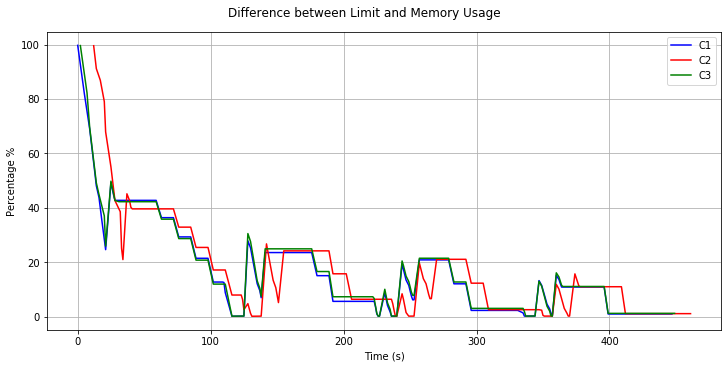

In [17]:
fig, ax = plt.subplots(ncols=1, nrows=1, constrained_layout=True, figsize=(10,5))

ax.plot(timediff0, diff0, label='C1', color='blue')
ax.plot(timediff1, diff1, label='C2', color='red')
ax.plot(timediff2, diff2, label='C3', color='green')
ax.set(xlabel='Time (s)', ylabel='Percentage %')
ax.grid()
ax.legend()

fig.suptitle('Difference between Limit and Memory Usage')

plt.savefig('test2.png')
plt.show()

In [19]:
i = 30
name = 'rqst%cntnr0'
while i < 50:
    cname = name.replace('%', str(i))
    datalist, timelist = database.get_local_container_history(cname)
    print(i, (timelist[-1] - timelist[0]).seconds)
    i += 1

30 421
31 424
32 426
33 423
34 421
35 425
36 424
37 420
38 420
39 420
40 424
41 425
42 421
43 424
44 422
45 424
46 423
47 424
48 424
49 421


In [28]:
datalist, timelist = database.get_local_container_history('rqst32cntnr0')
timediff = [(item - timelist[0]).seconds for item in timelist]

memory = []
limit = []
swap = []


for item in datalist:
    if item.state != 'SUSPENDED':
        memory.append((int(item.mem_stats['rss']) + int(item.mem_stats['cache'])) // 2 ** 20)
        limit.append(item.mem_limit // 2 ** 20)
        swap.append(int(item.mem_stats['swap']) // 2 ** 20)
    
    elif item.state in ['SUSPENDED','STOPPED']:
        memory.append(int(0))
        limit.append(int(0))
        swap.append(int(0))
        
print((timelist[-1] - timelist[0]).seconds)

426


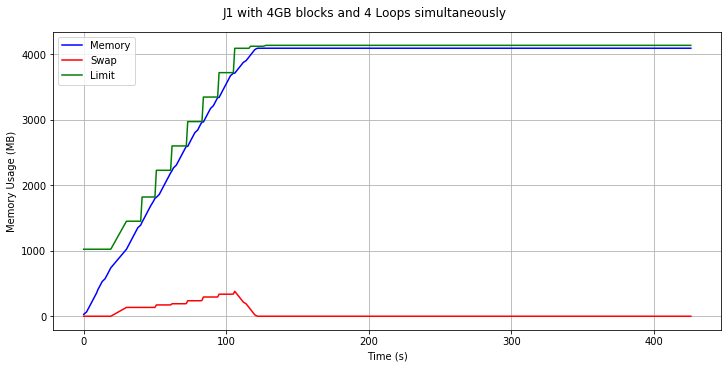

In [27]:
fig, ax = plt.subplots(ncols=1, nrows=1, constrained_layout=True, figsize=(10,5))

ax.plot(timediff, memory, label='Memory', color='blue')
ax.plot(timediff, swap, label='Swap', color='red')
ax.plot(timediff, limit, label='Limit', color='green')
ax.set(xlabel='Time (s)', ylabel='Memory Usage (MB)')
ax.grid()
ax.legend()

fig.suptitle('J1 with 4GB blocks and 4 Loops simultaneously')

plt.savefig('test3.png')
plt.show()